#### Import Statements

In [ ]:
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn as sm

#### Load Data

In [ ]:
# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Convert y to 2d array, appended to X
y = np.expand_dims(y,1)

#### Feature Selection

In [ ]:
# Isolates a feature/column from X by choosing a random integer
# rand = random.randint(0,9)
# if rand == 0: 
#     X = X[0, :]
# else: 
#     X = X[:, rand]
X = X[:, 2]

X = np.expand_dims(X, 1)
# 0: age
# 1: sex
# 2: bmi
# 3: bp (blood pressure)
# 4: #s1 tc (total serum cholesterol)
# 5: #s2 ldl (low-density lipoproteins)
# 6: #s3 hdl (high-density lipoproteins)
# 7: #s4 tch (total cholesterol)
# 8: #s5 ltg (possibly log of serum triglycerides level)
# 9: #s6 glu (blood sugar level)

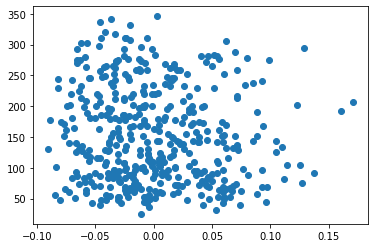

In [ ]:
plt.scatter(X, y)

#### Shuffle Dataset

In [ ]:
# Shuffle rows only
np.random.shuffle(X)

# Create new dataset, target appended in last column
nData = np.append(X, y, 1)

#### Train Dataset

In [ ]:
# Number of samples
total_sample = len(nData)

# Train/Dev/Test Splits
train = nData[:int(total_sample*0.70)]
dev = nData[int(total_sample*0.70):int(total_sample*0.85)]
test = nData[int(total_sample*0.85):]

#### Assign Features and Labels

In [ ]:
# Assign features/labels
def assign_xy(data):
  features = data[:,0]
  labels = data[:, -1]
  return features, labels

# Train/dev/test
train_X, train_y = assign_xy(train)
dev_X, dev_y = assign_xy(dev)
test_X, test_y = assign_xy(test)

# Correct matrix size
train_X = np.expand_dims(train_X, 1)
train_y = np.expand_dims(train_y, 1)
dev_X = np.expand_dims(dev_X, 1)
dev_y = np.expand_dims(dev_y, 1)
test_X = np.expand_dims(test_X, 1)
test_y = np.expand_dims(test_y, 1)


#### Linear Regression Model

In [ ]:
# Linear Regression Model
def linear_reg(theta, X):
  pred = theta[0] + theta[1] * X
  return pred

# Cost Function
def compute_cost(Y_pred, Y_trueValue):
  m = len(Y_trueValue)
  J = 1/(2*m) * np.sum((Y_pred - Y_trueValue)**2) #MSE
  # J = 1/m * (np.sum(np.abs(Y_pred - Y_trueValue))) #MAE
  return J

# Gradient Descent
def gradient(theta, X, Y_trueValue, Y_pred, learning_rate):
  n = len(Y_trueValue)
  theta[0] = theta[0] - (learning_rate * (1/n) * np.sum(Y_pred - Y_trueValue))
  theta[1] = theta[1] - (learning_rate * (1/n) * np.sum((Y_pred - Y_trueValue)*X))
  return theta

#### Training Data

In [ ]:
theta = [0.0, 0.0]
lr = .1

for i in range(1,100, 10):
  pred = linear_reg(theta, train_X)
  cost = compute_cost(pred, train_y)
  theta = gradient(theta, train_X, train_y, pred, lr)
  print(cost)

#### Dev Data

In [ ]:
theta = [0.0, 0.0]
lr = .3

for i in range(1, 100, 10):
  pred = linear_reg(theta, dev_X)
  cost = compute_cost(pred, dev_y)
  theta = gradient(theta, dev_X, dev_y, pred, lr)
  print(cost)

#### Testing Data

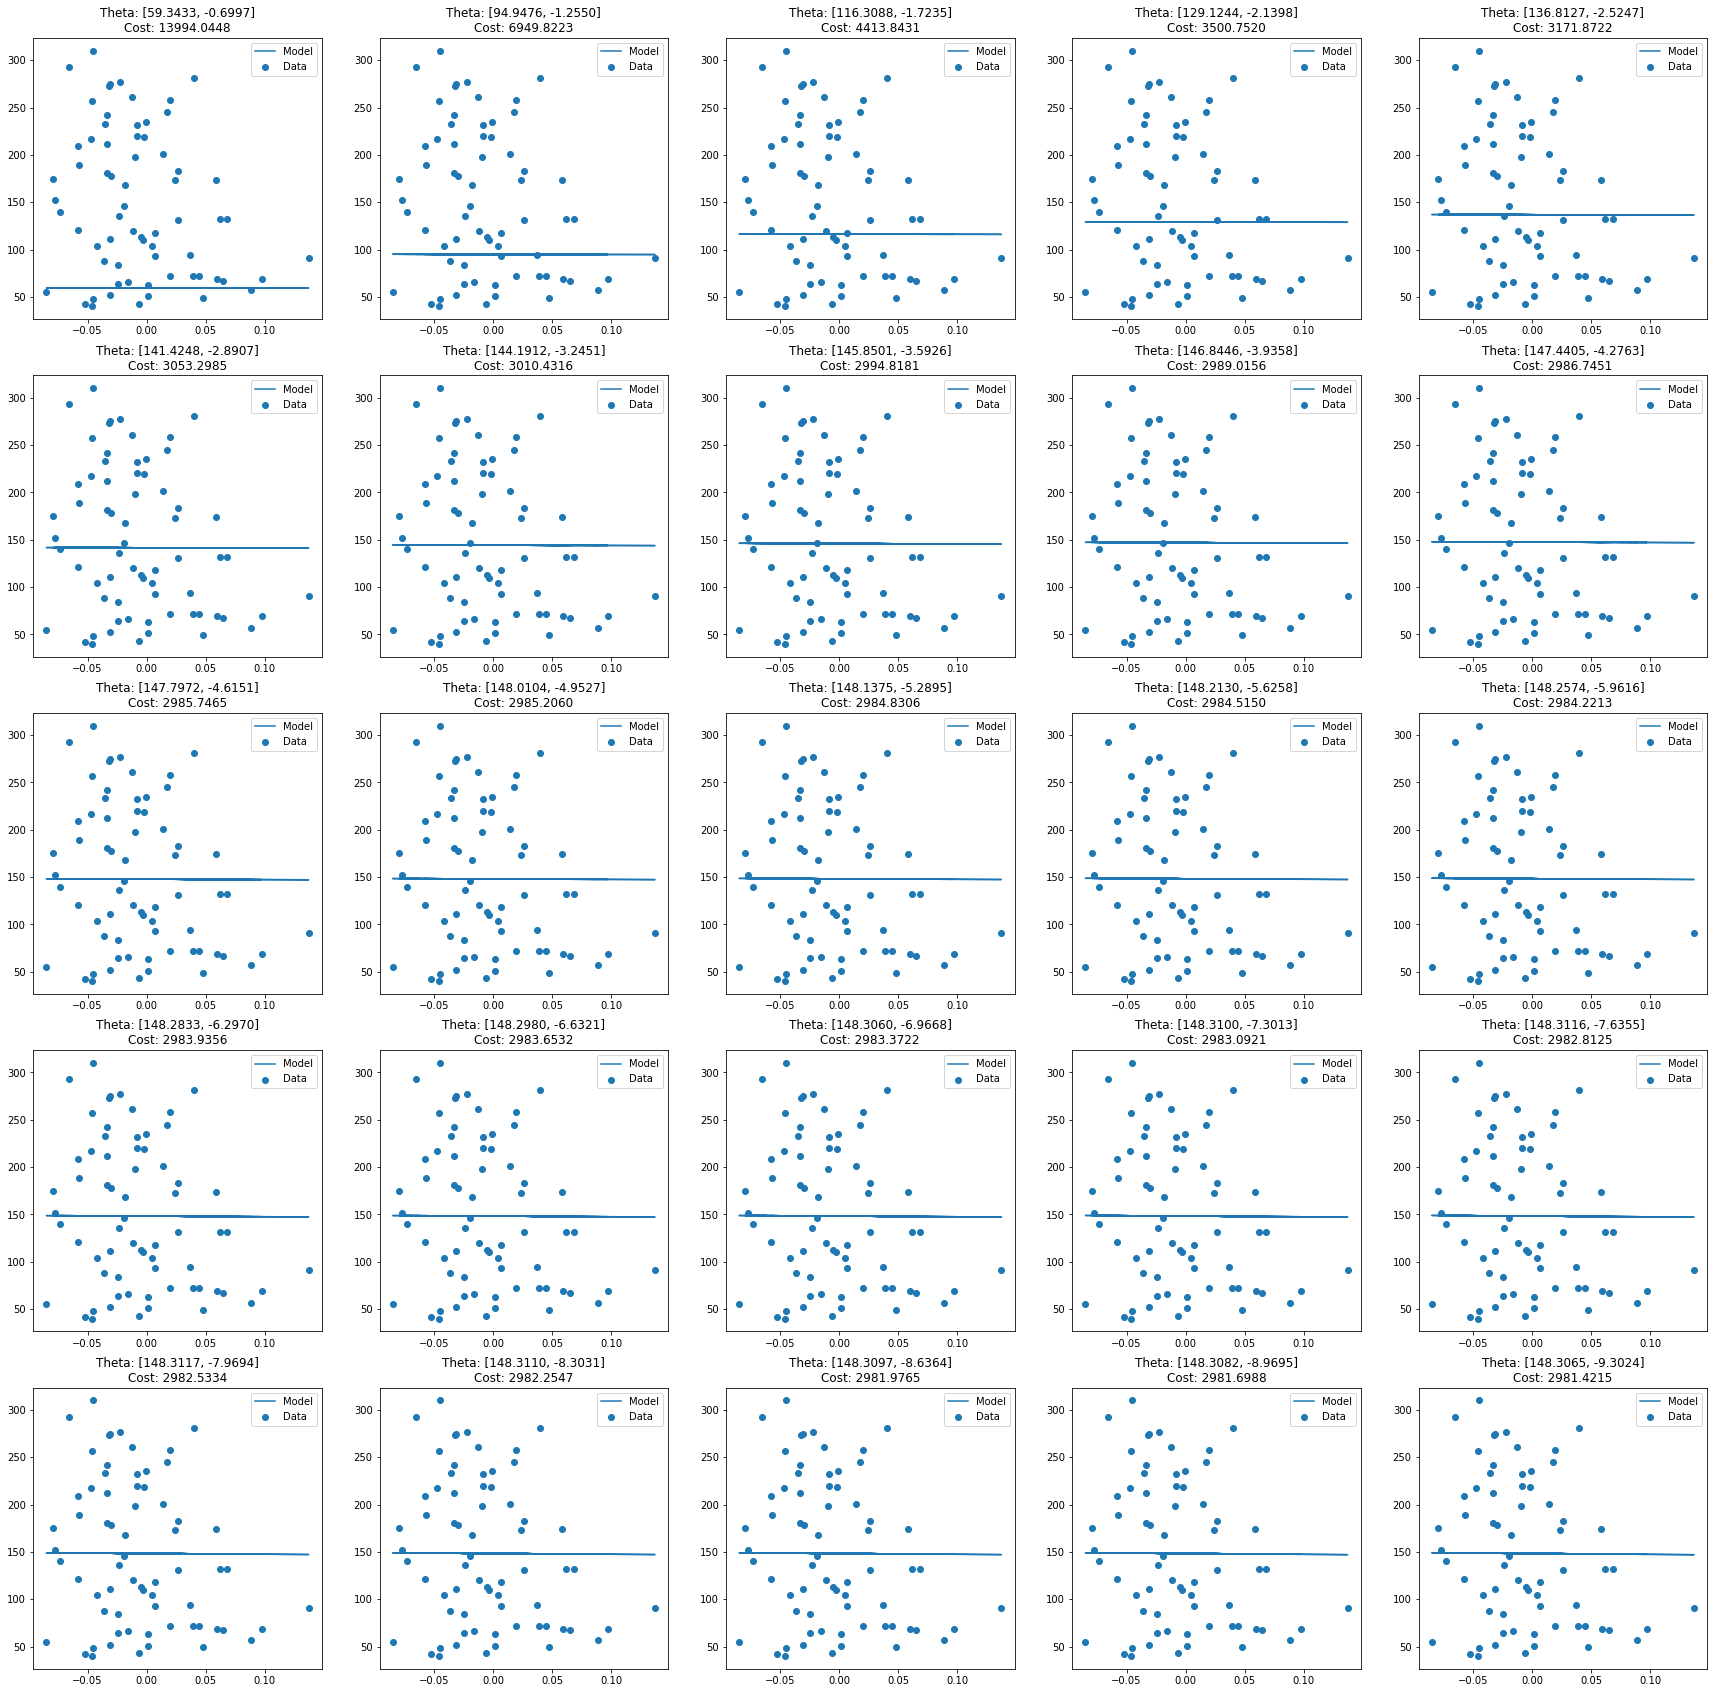

In [ ]:
theta = [0.0, 0.0]
lr = .4

plt.figure(figsize=(30,30))
for i in range(25):
  pred = linear_reg(theta, test_X)
  cost = compute_cost(pred, test_y)
  theta = gradient(theta, test_X, test_y, pred, lr)

  plt.subplot(5, 5, i+1)
  plt.scatter(test_X, test_y)

  temp_pred = linear_reg(theta, test_X)
  plt.plot(test_X, temp_pred)
  plt.legend(['Model', 'Data'])

  s = 'Theta: [%.4f, %.4f]' %(theta[0], theta[1])
  c = 'Cost: %.4f' %cost
  plt.title(s + '\n' + c)